In [1]:
import csv
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# READING THE DATA
## Importing data
Maintaining the original format of the data provided : Importing the data in a single format was resulting 
into columns data being modified.

In [2]:
dd = pd.read_excel('/Users/sonalichaudhari/Desktop/Data Scientist Technical Assessment.xlsx', sheetname='DATA')
dd = dd[['series','network','Type','# Eps','Air Day','daypart', 'Unique HHs', 'Total Hrs Viewed','Avg % Viewed']]

df = pd.read_csv('/Users/sonalichaudhari/Desktop/DATA.csv')
df = df[['National Time','Run_time (min)']]

df = pd.concat([dd, df], axis=1)
df = df[['series','network','Type','# Eps','Air Day','National Time','Run_time (min)','daypart', 'Unique HHs', 'Total Hrs Viewed','Avg % Viewed']]
df['Avg % Viewed']= df['Avg % Viewed'].apply(lambda x: x*100)

## Data Preview

In [3]:
df.head()

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed
0,series19,network4,Broadcast,1,M,9:00 PM,177,prime,2006831,2.133483e+06,29.302215
1,series314,network5,Broadcast,3,M,8:00 PM,121,prime,4473165,4.094865e+06,39.750605
2,series314,network5,Broadcast,1,M,8:00 PM,91,prime,1221582,9.647431e+05,46.806646
3,series19,network4,Broadcast,1,S,8:30 PM,178,prime,1599092,1.767497e+06,31.327114
4,series83,network18,Broadcast,4,R,8:00 PM,60,prime,3829201,2.390739e+06,56.783953


# DATA OVERVIEW
Getting to know basic info of the data : datatypes, basic statistics 

In [88]:
print("Column List : ",df.columns.tolist())
print("\nNumber of rows:  ",df.shape[0])
print("Number of columns: ",df.shape[1])
print("\nCount of unique series: ", df['series'].nunique())
print("Count of unique network: ", df['network'].nunique())
print("Count of unique daypart: ", df['daypart'].nunique())
print("---------------------------------------------")
print(df.info())
print("---------------------------------------------")
df.describe()

Column List :  ['series', 'network', 'Type', '# Eps', 'Air Day', 'National Time', 'Run_time (min)', 'daypart', 'Unique HHs', 'Total Hrs Viewed', 'Avg % Viewed', 'Engagemet Index']

Number of rows:   3451
Number of columns:  12

Count of unique series:  1416
Count of unique network:  68
Count of unique daypart:  7
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 3499
Data columns (total 12 columns):
series              3451 non-null object
network             3451 non-null object
Type                3451 non-null int64
# Eps               3451 non-null int64
Air Day             3451 non-null object
National Time       3451 non-null object
Run_time (min)      3451 non-null int64
daypart             3451 non-null object
Unique HHs          3451 non-null int64
Total Hrs Viewed    3451 non-null float64
Avg % Viewed        3451 non-null float64
Engagemet Index     3451 non-null float64
dtypes: float64(3), int64(4), object(5)
m

,Type,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet Index
count,3451.000000,3451.000000,3451.000000,3.451000e+03,3.451000e+03,3451.000000,3451.000000
mean,0.102869,4.060852,63.643292,3.421035e+05,1.497401e+05,48.785487,1.000456
std,0.303831,5.606394,42.041753,5.807847e+05,2.942932e+05,16.402265,0.110701
min,0.000000,1.000000,2.000000,1.286500e+04,6.268061e+02,14.705975,0.486217
25%,0.000000,1.000000,30.000000,6.719300e+04,2.784369e+04,35.462598,0.960664
50%,0.000000,2.000000,60.000000,1.384600e+05,6.173436e+04,49.786454,1.000000
75%,0.000000,4.000000,90.000000,3.292395e+05,1.305865e+05,60.668717,1.031884
max,1.000000,28.000000,185.000000,5.769701e+06,4.094865e+06,98.369918,1.651941


# Generating Engagement index

Engagement index, which would have the value of 1 for a program that performs exactly average, and is more or less than 1 commensurate with the program's APV

Method: Grouping by series and finding the average APV for a series and diving each row of APV for that seriesby the average value of APV

In [89]:
#Generate Engagement Index dataframe
s = df[['series','Avg % Viewed']].groupby(['series']).apply(lambda x: x/x.mean()).rename\
(columns={'Avg % Viewed':'Engagemet Index'})

# Concatenating the generated Engagement Index dataframe to original dataframe
df = pd.concat([df, s], axis=1)

# Data preview
df.head()

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet Index,Engagemet Index
0,series19,network4,1,1,M,9:00 PM,177,prime,2006831,2.133483e+06,29.302215,0.914482,0.914482
1,series314,network5,1,3,M,8:00 PM,121,prime,4473165,4.094865e+06,39.750605,0.885413,0.885413
2,series314,network5,1,1,M,8:00 PM,91,prime,1221582,9.647431e+05,46.806646,1.042580,1.042580
3,series19,network4,1,1,S,8:30 PM,178,prime,1599092,1.767497e+06,31.327114,0.977677,0.977677
4,series83,network18,1,4,R,8:00 PM,60,prime,3829201,2.390739e+06,56.783953,1.164641,1.164641


# Visualizations

In order to understand the relationships  between different columns of the data and to get insights

In [18]:
df['Unique HHs'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [94]:
# Box-Plot  for 'Unique HHs'
trace0 = go.Box(
    y=df['Unique HHs']
)
data = [trace0]
py.iplot(data)

In [7]:
df[df['Unique HHs']>6000000].shape

(12, 12)

In [13]:
# Box-Plot  for Run_time (min)

trace0 = go.Box(
    y=df['Run_time (min)']
)
data = [trace0]
py.iplot(data)

In [8]:
print("Number rows: ",df[df['Run_time (min)']>=185].shape[0])

#Removing the rows consisting of outliers
df = df[~(df['Unique HHs']>6000000)]
df = df[~(df['Run_time (min)']>185)]

Number rows:  38


In [96]:
# # Box-Plot for 'Total Hrs Viewed'
trace0 = go.Box(
    y=df['Total Hrs Viewed']
)
data = [trace0]
py.iplot(data)

In [91]:
# Slice of data consisting of outliers in 'Total Hrs Viewed'
print("Number rows: ",df[df['Total Hrs Viewed']>4100840].shape[0])
# Removing the rows consisting outlier
df = df[~(df['Total Hrs Viewed']>4100840)]

Number rows:  0


In [216]:
#Data Manipulation
# Generating new columns based on existing required for visualisations

df['Time']=df['National Time'].apply(lambda x:x.split(" ")[0].split(":")[0]+"-"+str(int(x.split(" ")[0].split(":")[0])+1)\
                                     +" "+x.split(" ")[1])

<Figure size 2880x2880 with 0 Axes>

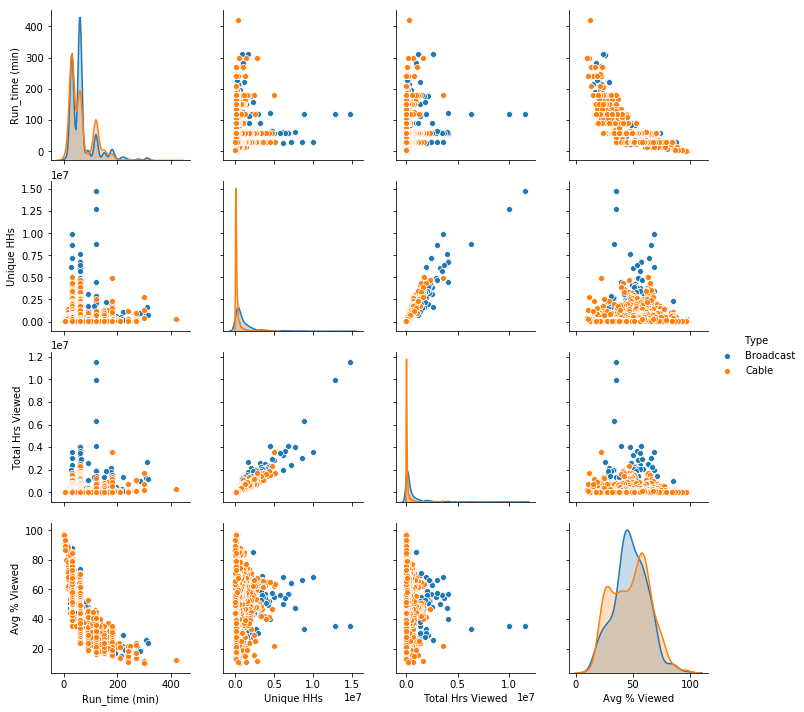

In [217]:
plt.figure(figsize=(40, 40))
sns.pairplot(df[['daypart','Type','Run_time (min)','Unique HHs','Total Hrs Viewed','Avg % Viewed']], hue='Type');

<Figure size 2880x2880 with 0 Axes>

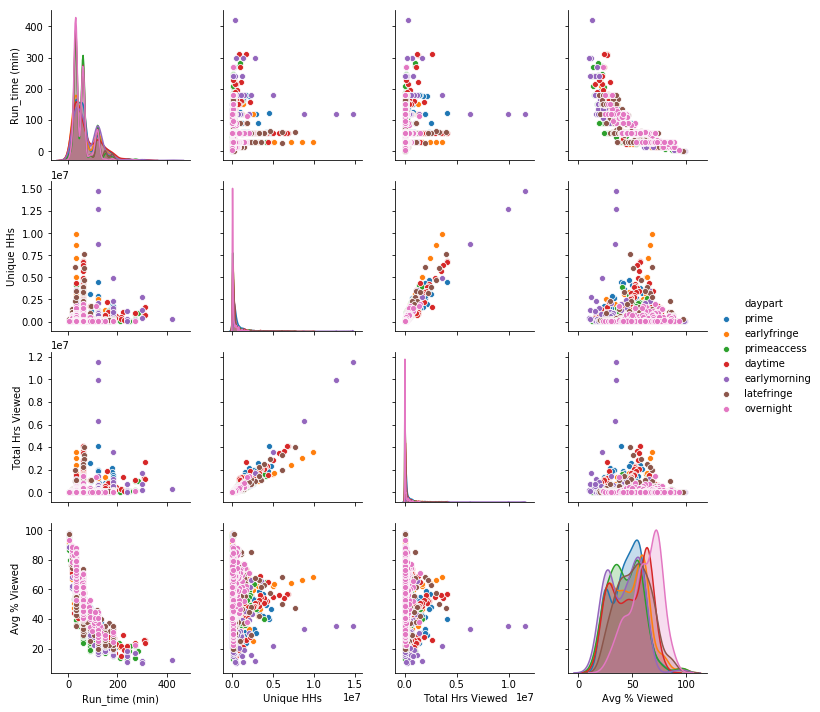

In [16]:
plt.figure(figsize=(40, 40))
sns.pairplot(df[['daypart','Type','Run_time (min)','Unique HHs','Total Hrs Viewed','Avg % Viewed']], hue='daypart');

In [92]:
tt = df[['daypart','Unique HHs']].groupby(['daypart']).mean().reset_index()
trace0 = go.Bar(
    x=tt['daypart'],
    y=tt['Unique HHs'],
    marker=dict(
        color=['rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(2222,45,38,0.8)','rgba(204,204,204,1)','rgba(204,204,204,1)']),
)

data = [trace0]
layout = go.Layout(
    title='Average Count of Unique Households recorded by part of the Day',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [13]:
temp = df[['daypart','Avg % Viewed']].groupby(['daypart']).mean().reset_index()
trace0 = go.Bar(
    x=temp['daypart'],
    y=temp['Avg % Viewed'],
    marker=dict(
        color=['rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(2222,45,38,0.8)','rgba(204,204,204,1)','rgba(204,204,204,1)']),
)

data = [trace0]
layout = go.Layout(
    title='Audience Engagement based on Average % Viewed by part of the Day',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

From the above graph it is clear that late night shows have larger audience engagement more than 60%.This imply our auidence are more involved at night time. Also the least audience engagement is in early morning which is intuitive as working class audience have jobs to go to, students have schools and universities.advertise retening


In [159]:
t = df[['Type','daypart','Unique HHs']].groupby(['daypart','Type']).mean().reset_index()
t1= t[t['Type']=='Broadcast']
t2= t[t['Type']=='Cable']

trace0 = go.Bar(
    x=t['daypart'].unique().tolist(),
    y=t1['Unique HHs'],
    name='Broadcast',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=t['daypart'].unique().tolist(),
    y=t2['Unique HHs'],
    name='Cable',
    marker=dict(
        color='rgb(2222,45,38,0.8)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Average Count of Households for Type of TV network used in different part of the Day',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [73]:
t = df[['Type','daypart','Avg % Viewed']].groupby(['daypart','Type']).mean().reset_index()
t1= t[t['Type']=='Broadcast']
t2= t[t['Type']=='Cable']

trace0 = go.Bar(
    x=t['daypart'].unique().tolist(),
    y=t1['Avg % Viewed'],
    name='Broadcast',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=t['daypart'].unique().tolist(),
    y=t2['Avg % Viewed'],
    name='Cable',
    marker=dict(
        color='rgb(200,200,200)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Audience Engagement based on Average % Viewed for type of TV network by part of the Day',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='Time',y='num_children',ax=ax)
df.plot(kind='line',x='Time',y='num_pets', color='red', ax=ax)

plt.show()

In [180]:
a= df[['Type','series']].groupby(['Type']).count().reset_index()
trace0 = go.Bar(
    x=a['Type'],
    y=a['series'],
    marker = dict(
          color = ['rgba(224,224,204,1)', 'rgba(224,224,224,1)']
        ))

data = [trace0]
layout = go.Layout(
    title='Average Count Unique Households recorded by hour slot',)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [70]:
s = df[['daypart','Run_time (min)']].groupby(['daypart']).mean().reset_index()
trace0 = go.Bar(
    x=s['daypart'],
    y=s['Run_time (min)'])

data = [trace0]
layout = go.Layout(
    title='Run Time by Daypart',
    yaxis=dict(
        title='Run Time in Minutes',
        titlefont=dict(size=16),
        )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [61]:
s = df[['Time','Run_time (min)']].groupby(['Time']).mean().reset_index()
trace0 = go.Bar(
    x=s['Time'],
    y=s['Run_time (min)'])

data = [trace0]
layout = go.Layout(
    title='Run Time by hour slot',)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [175]:
s = df[['Time','Unique HHs']].groupby(['Time']).mean().reset_index()
trace0 = go.Bar(
    x=s['Time'],
    y=s['Unique HHs'],
    marker = dict(
          color = 'Green'
        ))

data = [trace0]
layout = go.Layout(
    title='Average Count Unique Households recorded by hour slot',)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [149]:
ss = df[['daypart','series']].groupby(['daypart']).count().reset_index()
trace0 = go.Bar(
    x=ss['daypart'],
    y=ss['series'],
    marker = dict(
          color = 'rgba(224,200,204,1)'
        )
)
data = [trace0]
layout = go.Layout(
    title='Number series available as per day part',
)
print("ejvvoirvirovijvev")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

ejvvoirvirovijvev


In [93]:
p = df[['network','series']].groupby(['network']).count().reset_index().sort_values(by='series')
trace0 = go.Bar(
    x=p['network'],
    y=p['series'],
    marker = dict(
          color = 'purple'
        ))

data = [trace0]
layout = go.Layout(
    title='Number of series per Network',
    yaxis=dict(
        title='Count of series',
        titlefont=dict(size=16),
        )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Bar(
        x = ['2016','2017','2018'],
        y = [500,600,700],
        base = [-500,-600,-700],
        marker = dict(
          color = 'red'
        ),
        name = 'expenses'
    ),
    go.Bar(
        x = ['2016','2017','2018'],
        y = [300,400,700],
        base = 0,
        marker = dict(
          color = 'blue'
        ),
        name = 'revenue'
    )
]


fig = go.Figure(data=data)
py.iplot(fig, filename='base-bar') 

In [89]:
df.shape

(3497, 13)

In [182]:
df[df['Air Day'].str.len()>1]['series'].nunique()

385

# Dealing with Categorical columns

In [10]:
df

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet Index
0,series19,network4,Broadcast,1,M,9:00 PM,177,prime,2006831,2.133483e+06,29.302215,0.914482
1,series314,network5,Broadcast,3,M,8:00 PM,121,prime,4473165,4.094865e+06,39.750605,0.885413
2,series314,network5,Broadcast,1,M,8:00 PM,91,prime,1221582,9.647431e+05,46.806646,1.042580
3,series19,network4,Broadcast,1,S,8:30 PM,178,prime,1599092,1.767497e+06,31.327114,0.977677
4,series83,network18,Broadcast,4,R,8:00 PM,60,prime,3829201,2.390739e+06,56.783953,1.164641
5,series83,network18,Broadcast,1,W,8:00 PM,120,prime,1259646,1.187089e+06,41.218419,0.845392
6,series314,network5,Broadcast,4,T,9:00 PM,61,prime,4191927,2.322875e+06,49.513827,1.102880
7,series83,network18,Broadcast,3,W,8:00 PM,90,prime,3149616,2.550062e+06,48.267414,0.989967
8,series19,network4,Broadcast,1,S,6:00 PM,150,earlyfringe,1302383,1.323798e+06,35.497885,1.107841
9,series39,network4,Broadcast,1,U,7:12 PM,60,primeaccess,944711,5.195033e+05,50.854024,1.015427


In [11]:
df['Type'] = df['Type'].map({'Broadcast': 1, 'Cable': 0})
#df['daypart'] = df['daypart'].map({'prime':0, 'earlyfringe':1,'primeaccess':2, 'daytime':3,\'earlymorning':4,'latefringe':5, 'overnight':6})

In [73]:
dt = df.copy()
dt['series']= df['series'].apply(lambda x: int(x.replace('series','')))
dt['network']= df['network'].apply(lambda x: int(x.replace('network','')))
dt.head()

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet Index
0,19,4,1,1,M,9:00 PM,177,prime,2006831,2.133483e+06,29.302215,0.914482
1,314,5,1,3,M,8:00 PM,121,prime,4473165,4.094865e+06,39.750605,0.885413
2,314,5,1,1,M,8:00 PM,91,prime,1221582,9.647431e+05,46.806646,1.042580
3,19,4,1,1,S,8:30 PM,178,prime,1599092,1.767497e+06,31.327114,0.977677
4,83,18,1,4,R,8:00 PM,60,prime,3829201,2.390739e+06,56.783953,1.164641


In [74]:
# Generating separte colummns for days of week

day =['M','T','W','R','F','S','U']
for i in day:
    dt[i]=0
for index, row in dt.iterrows():
    l = row['Air Day'].split(" ")
    #print(l, index)
    for x in l:
         dt.loc[index,x] = 1

In [75]:
ds = pd.get_dummies(dt, columns=['daypart']).drop(columns=['Air Day','National Time'])
ds.to_excel('/Users/sonalichaudhari/Desktop/comScore.xlsx', sheet_name='Sheet1')
ds.head()

,series,network,Type,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet Index,M,...,F,S,U,daypart_daytime,daypart_earlyfringe,daypart_earlymorning,daypart_latefringe,daypart_overnight,daypart_prime,daypart_primeaccess
0,19,4,1,1,177,2006831,2.133483e+06,29.302215,0.914482,1,...,0,0,0,0,0,0,0,0,1,0
1,314,5,1,3,121,4473165,4.094865e+06,39.750605,0.885413,1,...,0,0,0,0,0,0,0,0,1,0
2,314,5,1,1,91,1221582,9.647431e+05,46.806646,1.042580,1,...,0,0,0,0,0,0,0,0,1,0
3,19,4,1,1,178,1599092,1.767497e+06,31.327114,0.977677,0,...,0,1,0,0,0,0,0,0,1,0
4,83,18,1,4,60,3829201,2.390739e+06,56.783953,1.164641,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
#ds.corr(method='pearson')

In [77]:
# sns.pairplot(ds, x_vars=['series', 'network', 'Type', '# Eps', 'Run_time (min)', 'Unique HHs',
#        'Total Hrs Viewed', 'Avg % Viewed', 'M', 'T', 'W',
#        'R', 'F', 'S', 'U', 'daypart_daytime', 'daypart_earlyfringe',
#        'daypart_earlymorning', 'daypart_latefringe', 'daypart_overnight',
#        'daypart_prime', 'daypart_primeaccess'], y_vars='Engagemet Index', size=10, aspect=0.7, kind='reg')

# Regression

In [78]:
ds.columns

Index(['series', 'network', 'Type', '# Eps', 'Run_time (min)', 'Unique HHs',
       'Total Hrs Viewed', 'Avg % Viewed', 'Engagemet Index', 'M', 'T', 'W',
       'R', 'F', 'S', 'U', 'daypart_daytime', 'daypart_earlyfringe',
       'daypart_earlymorning', 'daypart_latefringe', 'daypart_overnight',
       'daypart_prime', 'daypart_primeaccess'],
      dtype='object')

In [85]:
ds = ds[[ 'network', 'Type', '# Eps', 'Unique HHs',
       'Total Hrs Viewed', 'Avg % Viewed','daypart_daytime', 'daypart_earlyfringe',
       'daypart_earlymorning', 'daypart_latefringe', 'daypart_overnight',
       'daypart_prime', 'daypart_primeaccess']]

In [86]:
#ds = ds.drop(columns=['Avg % Viewed'])
target_cols = ['Avg % Viewed']
cols = [x for x in ds.columns if x not in target_cols]
print(len(cols))
cols

12


['network',
 'Type',
 '# Eps',
 'Unique HHs',
 'Total Hrs Viewed',
 'daypart_daytime',
 'daypart_earlyfringe',
 'daypart_earlymorning',
 'daypart_latefringe',
 'daypart_overnight',
 'daypart_prime',
 'daypart_primeaccess']

In [87]:
# Taking all columns as features

from sklearn.metrics import r2_score
feature = cols
print("Total Number of features taken :", len(feature))
X = ds[feature]
y = ds[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print(linreg.intercept_)
# print(linreg.coef_)
zip(cols, linreg.coef_)

y_pred = linreg.predict(X_test)

# calculate RMSE and MSE using scikit-learn

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

# Coefficients
print("----------------------------------------------")
print("Intercept: ",linreg.intercept_[0])
print("Features and their co-efficients\n")
for i in range(len(feature)):
    print(feature[i],":    ",linreg.coef_[0][i])

Total Number of features taken : 12
Mean Absolute Error: 12.245878911074971
Mean Squared Error: 216.3545829317831
Root Mean Squared Error: 14.708996666386973
----------------------------------------------
Intercept:  45.55312450538568
Features and their co-efficients

network :     0.01930685440493961
Type :     2.358425491053121
# Eps :     0.5613953823946151
Unique HHs :     1.8371187933748076e-05
Total Hrs Viewed :     -3.986353522879884e-05
daypart_daytime :     -0.14262139807372484
daypart_earlyfringe :     -2.6793715428827
daypart_earlymorning :     -6.492317660361126
daypart_latefringe :     3.0441022947860943
daypart_overnight :     13.973553211876057
daypart_prime :     -2.239333246325071
daypart_primeaccess :     -5.464011659019536


In [19]:
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression
# Selector_f = SelectPercentile(f_regression, percentile=25)
# Selector_f.fit(X,y)
# for n,s in zip(cols, Selector_f.scores_):
#  print('F-score: %3.2ft for feature %s ' % (s,n))

In [1263]:
# Taking all columns as features
feature = ['series', 'network','Type',#'# Eps',
 'Run_time (min)',
 'Unique HHs',
 'Total Hrs Viewed',
 #'M',
 'T',
 'W',
 #'R',
 #'F',
 'S',
 'U',
 #'daypart_daytime',
 'daypart_earlyfringe',
 'daypart_earlymorning',
 'daypart_latefringe',
 'daypart_overnight',
 'daypart_prime',
 'daypart_primeaccess']

X = ds[feature]
y = ds[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# instantiate
l = LinearRegression()
# fit the model to the training data (learn the coefficients)
l.fit(X_train, y_train)

# print(linreg.intercept_)
# print(linreg.coef_)
zip(cols, linreg.coef_)

print("Total Number of features taken :", len(feature))

y_pred = l.predict(X_test)

# calculate RMSE and MSE using scikit-learn
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:  ",metrics.mean_absolute_error(y_test, y_pred))

# Coefficients
print("----------------------------------------------")
print("Features and their co-efficients\n")

print("Intercept: ",linreg.intercept_)
for i in range(len(feature)):
    print(feature[i],":    ",linreg.coef_[0][i])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Total Number of features taken : 15
RMSE:  0.09921979061835086
MSE:   0.06937652443750203
----------------------------------------------
Features and their co-efficients

Intercept:  [64.62246251]
series :     0.000692522768769049
network :     0.013353896244739354
Type :     1.8803797857808833
Run_time (min) :     -0.10934034944565404
Unique HHs :     -0.284987000933055
Total Hrs Viewed :     -2.386866250905785e-06
T :     4.565234357979239e-06
W :     1.9432421310974544
U :     0.7799347543846488
daypart_earlyfringe :     1.1750389235693826
daypart_earlymorning :     1.5518207269931528
daypart_latefringe :     1.560810598313264
daypart_overnight :     1.0476775506852127
daypart_prime :     0.3635148988450812
daypart_primeaccess :     2.294023716360145


In [1191]:
# With respect to APV

ds = ds.drop(columns=['Engagemet Index'])
target_cols = ['Avg % Viewed']
cols = [x for x in ds.columns if x not in target_cols]

# Taking all columns as features
feature = cols
print("Total Number of features taken :", len(feature))
X = ds[feature]
y = ds[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print(linreg.intercept_)
# print(linreg.coef_)
zip(cols, linreg.coef_)

y_pred = linreg.predict(X_test)

# calculate RMSE and MSE using scikit-learn
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:  ",metrics.mean_absolute_error(y_test, y_pred))

# Coefficients
print("----------------------------------------------")
print("Intercept: ",linreg.intercept_[0])
print("Features and their co-efficients\n")
for i in range(len(feature)):
    print(feature[i],":    ",linreg.coef_[0][i])

Total Number of features taken : 21


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

RMSE:  8.123900879295142
MSE:   5.932422079508528
----------------------------------------------
Intercept:  64.62246250519142
Features and their co-efficients

series :     0.000692522768769049
network :     0.013353896244739354
Type :     1.8803797857808833
# Eps :     -0.10934034944565404
Run_time (min) :     -0.284987000933055
Unique HHs :     -2.386866250905785e-06
Total Hrs Viewed :     4.565234357979239e-06
M :     1.9432421310974544
T :     0.7799347543846488
W :     1.1750389235693826
R :     1.5518207269931528
F :     1.560810598313264
S :     1.0476775506852127
U :     0.3635148988450812
daypart_daytime :     2.294023716360145
daypart_earlyfringe :     -0.9083590054532019
daypart_earlymorning :     -3.7488870555609335
daypart_latefringe :     0.6631817735376839
daypart_overnight :     10.151360098839524
daypart_prime :     -2.524456863604572
daypart_primeaccess :     -5.926862664118643


In [1264]:
s = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master//Iris_Data.csv")

In [1268]:
ds.describe()

,series,network,Type,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Engagemet Index,M,T,...,F,S,U,daypart_daytime,daypart_earlyfringe,daypart_earlymorning,daypart_latefringe,daypart_overnight,daypart_prime,daypart_primeaccess
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,722.869143,22.676571,0.108857,4.098857,65.612286,3.716375e+05,1.690007e+05,1.000000,0.213714,0.202857,...,0.245714,0.327714,0.313714,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,408.219669,13.526829,0.311504,5.664574,46.158192,7.660410e+05,4.385123e+05,0.110663,0.409986,0.402184,...,0.430571,0.469447,0.464068,0.349977,0.349977,0.349977,0.349977,0.349977,0.349977,0.349977
min,1.000000,1.000000,0.000000,1.000000,2.000000,1.286500e+04,6.268061e+02,0.486217,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,376.750000,11.000000,0.000000,1.000000,30.000000,6.796900e+04,2.809981e+04,0.960555,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,726.000000,23.000000,0.000000,2.000000,60.000000,1.393025e+05,6.294667e+04,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1062.000000,32.000000,0.000000,4.000000,90.000000,3.331402e+05,1.347992e+05,1.031125,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1441.000000,69.000000,1.000000,28.000000,420.000000,1.478116e+07,1.155655e+07,1.651941,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
